<a href="https://colab.research.google.com/github/KaueAbbe/Desigualdade_Educacional/blob/main/Modelo/Desigualdade_educacional_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'green' size = 6> Desigualdade Educacional - Modelo de Machine Learning</font>

**Resumo do Projeto:**

Desigualdade Educacional é uma questão social presente em todos os países, e que ocorre por diversos motivos. Entre esses motivos há diferenças econômicas, de gênero, cor de pele, geográfica. Independente do motivo, a desigualdade reflete no poder social do país, o qual é mostrado pelo índice de desenvolvimento humano e no grupo de desenvolvimento humano ao qual o país pertence.

Dado este contexto, o projeto tem como motivação compreender como está e como evolui a desigualdade mundial no contexto da educação, conectando a relação de mudança na desigualdade índices de desenvolvimento do páis, e com alvo em relacionar o grupo de desenvolvimento do país com as outras variáveis.

**Resumo do Notebook:**



**Resumo dos Dados:**

Os dados usados nesse notebook tem origem em:
1. [Inequality in Education Around the Workd](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world)
2. [Humam Development Reports](https://hdr.undp.org/data-center/documentation-and-downloads)

# Importar dados e Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/Desigualdade_tratado2.csv')
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,...,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola,taxa_aumento
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,...,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844,2.985070,1.437791e-01
1,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,...,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000,11.286455,5.304336e-02
2,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,...,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896,8.069284,-2.561161e-02
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,...,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239,10.555120,-5.762831e-01
4,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,...,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100,5.417391,-2.732857e-16


# Criar o modelo:
O modelo tem como objetivo Prever qual grupo de desenvolvimento humano aquele país está.

Para tal devemos lembrar:
1. Existe muita correlação entre os dados de taxa. Podemos retirá-los, já que temos a taxa de aumento, que leva em consideração as taxas dos anos anteriores.
2. Colunas como ISO3, países não contribuiem com informação de aprendizado.
3. Devemos retirar todos os valores Nan
4. Devemos realizar o OneHot-Encoding nas variáveis qualitativas
5. Devemos realizar a normalização dos dados.

In [3]:
dados_modelo = dados.drop(['ISO3', 'paises'], axis = 1)
dados_modelo.head(1)

,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola,taxa_aumento
0,Baixa,SA,180.0,42.809,44.82338,44.82338,44.82338,44.82338,45.36517,45.36517,45.36517,45.36517,45.36517,45.36517,45.36517,61.9824,10.263844,2.98507,0.143779


In [5]:
dados_modelo = dados_modelo.drop(['taxa '+ str(x) for x in range(2010, 2021)], axis = 1)
dados_modelo.head(2)

,Human Development Groups,regioes,IDH(2021),taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola,taxa_aumento
0,Baixa,SA,180.0,45.36517,61.9824,10.263844,2.985070,0.143779
1,Alta,ECA,67.0,12.33344,76.4626,14.448000,11.286455,0.053043


In [7]:
dados_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Human Development Groups  181 non-null    object 
 1   regioes                   140 non-null    object 
 2   IDH(2021)                 181 non-null    float64
 3   taxa 2021                 182 non-null    float64
 4   expectativa_vida          169 non-null    float64
 5   Anos esperado de escola   169 non-null    float64
 6   media anos de escola      169 non-null    float64
 7   taxa_aumento              182 non-null    float64
dtypes: float64(6), object(2)
memory usage: 11.5+ KB


In [9]:
dados_modelo = dados_modelo.dropna()
dados_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 181
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Human Development Groups  129 non-null    object 
 1   regioes                   129 non-null    object 
 2   IDH(2021)                 129 non-null    float64
 3   taxa 2021                 129 non-null    float64
 4   expectativa_vida          129 non-null    float64
 5   Anos esperado de escola   129 non-null    float64
 6   media anos de escola      129 non-null    float64
 7   taxa_aumento              129 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.1+ KB


In [10]:
dados_modelo = pd.get_dummies(dados_modelo, columns=['regioes'])
dados_modelo

,Human Development Groups,IDH(2021),taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola,taxa_aumento,regioes_AS,regioes_EAP,regioes_ECA,regioes_LAC,regioes_SA,regioes_SSA
0,Baixa,180.0,45.36517,61.9824,10.263844,2.985070,1.437791e-01,0,0,0,0,1,0
1,Alta,67.0,12.33344,76.4626,14.448000,11.286455,5.304336e-02,0,0,1,0,0,0
2,Alta,91.0,33.28262,76.3767,14.626896,8.069284,-2.561161e-02,1,0,0,0,0,0
4,Media,148.0,34.17144,61.6434,12.172100,5.417391,-2.732857e-16,0,0,0,0,0,1
5,Muito Alta,47.0,5.78729,75.3899,17.874870,11.147269,-1.022072e-01,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Media,140.0,17.49305,70.4490,11.535315,7.064846,2.484415e-16,0,1,0,0,0,0
178,Alta,115.0,15.25479,73.6181,12.951932,8.370280,-4.801217e-02,0,1,0,0,0,0
179,Baixa,183.0,46.13765,63.7534,9.098710,3.200000,-1.843241e-01,1,0,0,0,0,0
180,Media,154.0,20.43572,61.2234,10.928760,7.187091,-3.719474e-01,0,0,0,0,0,1


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [13]:
X = dados_modelo.drop(columns=['Human Development Groups'], axis =1 )
y = dados_modelo['Human Development Groups']

In [ ]:
X

In [ ]:
y

# Separar em treino e teste, e escalonar os dados.

In [181]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[:5]

array([[ 1.41238889,  1.60625386, -1.04885272, -0.95343906, -1.69831752,
         0.73080693, -0.40269363, -0.44095855, -0.36273813, -0.51449576,
         3.8890873 , -0.67040152],
       [-1.12187906, -0.70091029,  1.20458783,  0.78787138,  1.13512428,
         0.51965633, -0.40269363, -0.44095855,  2.75680975, -0.51449576,
        -0.25712974, -0.67040152],
       [-0.58362746,  0.76232512,  1.19121989,  0.86232214,  0.03703454,
         0.3366189 ,  2.4832774 , -0.44095855, -0.36273813, -0.51449576,
        -0.25712974, -0.67040152],
       [ 0.69472009,  0.82440645, -1.10160864, -0.1592846 , -0.86811395,
         0.3962195 , -0.40269363, -0.44095855, -0.36273813, -0.51449576,
        -0.25712974,  1.49164339],
       [-1.57042206, -1.15813862,  1.0376519 ,  2.21402402,  1.08761718,
         0.15837373, -0.40269363, -0.44095855, -0.36273813,  1.94365063,
        -0.25712974, -0.67040152]])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Separar o treino para validação



In [217]:
scaler = StandardScaler()
scaler.fit(X_train)
X_val = scaler.transform(X_val)
X_val[:3]

array([[ 0.9702933 ,  1.42552641, -0.47187452, -1.62018595, -1.0961448 ,
        -0.01233   , -0.5153882 , -0.39641248, -0.39641248, -0.41702883,
         3.89871774, -0.6681531 ],
       [-0.00823679,  0.01522535, -1.25236796, -0.10053594,  0.86347672,
        -2.11576176, -0.5153882 , -0.39641248, -0.39641248, -0.41702883,
        -0.25649459,  1.49666295],
       [-0.03047611, -0.90271008,  0.02701462,  0.26241176,  0.4005894 ,
        -0.43838517, -0.5153882 ,  2.5226249 , -0.39641248, -0.41702883,
        -0.25649459, -0.6681531 ]])

# Modelos
1. Vou usar o [Cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) para conseguir fazer validação cruzada, e saber o intervalo de acerto do modelo.
2. Foi usar o [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) como cross_validator.
3. As métricas usadas serão [Acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) para avaliar quão bem o modelo está. E [precisão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) para diminuir os falsos positivos.
4. A [matrix confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) será usada para verificar quais erros os modelos têm.
5. Será utilizado métrica sobre dados de validação. Os dados de validação analisam como o modelo responde à dados nunca vistos. **Esta informação será de muita importância para conclusão de qual modelo otimizar.**


## Dummy

O modelo Dummy tem acurácia de 30%.

A baseline aqui será adotada como 30%

In [218]:
def treinando_cv(modelo, x, y, cv, teste = False):
  results = cross_validate(modelo, x, y, cv = cv,  return_train_score=teste)
  media = results['test_score'].mean()
  std = results['test_score'].std()
  print('acuracia media: [%.2f]'%( media*100))
  print('acuracia intervalo: [%.2f, %.2f]'%( (media-2*std)*100, (media+2*std)*100))
  if teste == True:
    media_treino = results['train_score'].mean()
    print('acuracia media treino: [%.2f]'%( media_treino*100))

def metricas(modelo):
  modelo.fit(X_treino, y_train)
  y_pred = modelo.predict(X_teste)
  accuracy = accuracy_score(y_test, y_pred)
  precisao = precision_score(y_test, y_pred, average = 'micro')
  matriz = confusion_matrix(y_test, y_pred)

  print(f"Acurácia: {accuracy:.2f}")
  print(f"Precisão: {precisao:.2f}")

  #print(matriz)
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.4)  # Ajusta o tamanho da fonte
  sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=["Baixo", "Alto", "Medio", "Muito Alto"],
              yticklabels=["Baixo", "Alto", "Medio", "Muito Alto"])

  # Configuração de rótulos
  plt.xlabel('Valores Previstos')
  plt.ylabel('Valores Reais')
  plt.title('Matriz de Confusão')
  plt.show()

  print("--------------VALIDAÇÃO-------------------------")
  y_pred = modelo.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  precisao = precision_score(y_val, y_pred, average = 'micro')
  matriz = confusion_matrix(y_val, y_pred)

  print(f"Acurácia Validação: {accuracy:.2f}")
  print(f"Precisão Validação: {precisao:.2f}")



In [219]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [220]:
dummy_model = DummyClassifier(strategy="uniform", random_state = 42)  # Estratégia de previsão uniforme
treinando_cv(dummy_model, X, y, cv)

acuracia media: [23.97]
acuracia intervalo: [4.18, 43.77]


## LinearSVM

Acurácia Média do Modelo: 74.42%

In [221]:
def treinando(modelo):
  modelo.fit(X_treino, y_train)
  y_pred = modelo.predict(X_teste)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.74
Acurácia: 0.74
Precisão: 0.74


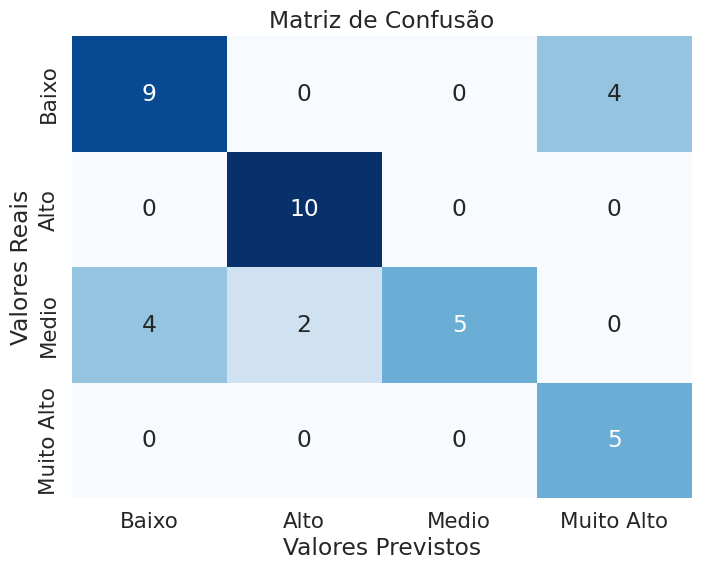

--------------VALIDAÇÃO-------------------------
Acurácia Validação: 0.56
Precisão Validação: 0.56


In [222]:
from sklearn.svm import LinearSVC
modelo_svc = LinearSVC(random_state = 42)
treinando(modelo_svc)
metricas(modelo_svc)

acuracia media: [72.95]
acuracia intervalo: [54.73, 91.17]
Acurácia: 0.74
Precisão: 0.74


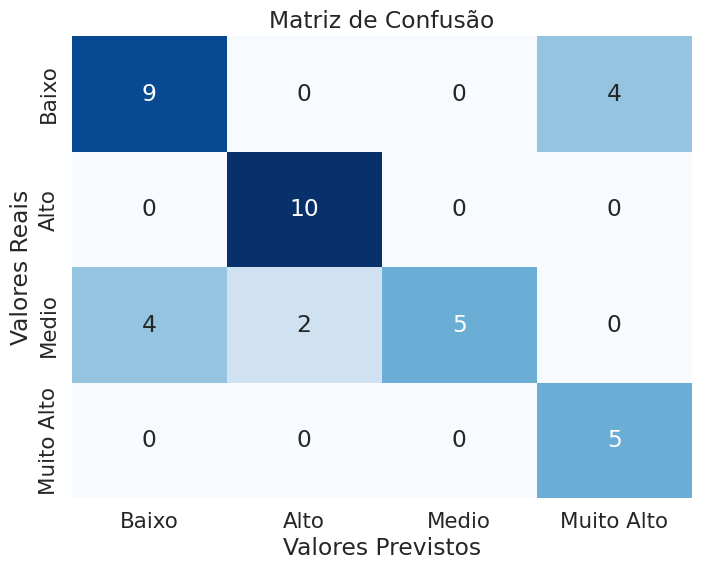

--------------VALIDAÇÃO-------------------------
Acurácia Validação: 0.56
Precisão Validação: 0.56


In [223]:
cv2 = KFold(n_splits = 10, shuffle = True, random_state = 42)
treinando_cv(modelo_svc, X, y, cv2)
metricas(modelo_svc)

## SVC

Acurária 72.76%

acuracia media: [72.76]
acuracia intervalo: [51.05, 94.46]
acuracia media treino: [87.34]
Acurácia: 0.74
Precisão: 0.74


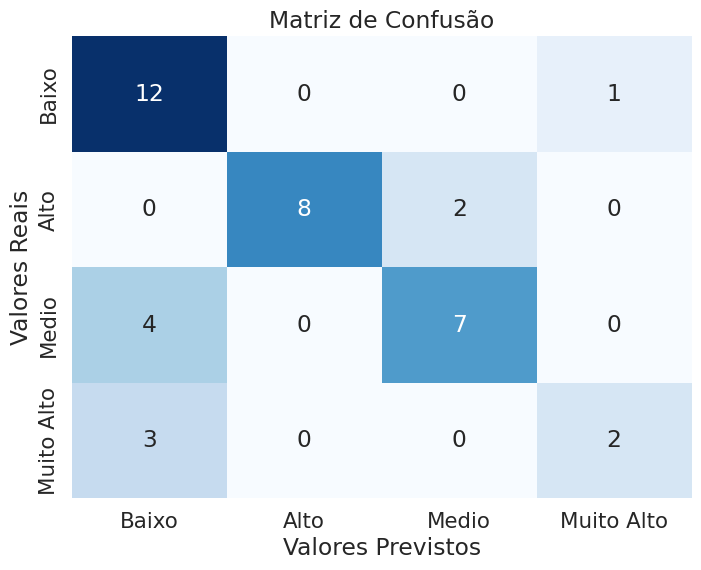

--------------VALIDAÇÃO-------------------------
Acurácia Validação: 0.67
Precisão Validação: 0.67


In [224]:
from sklearn.svm import SVC
SVC_model = SVC()
treinando_cv(SVC_model, X, y, cv, teste = True)
metricas(SVC_model)

## K-Neighbors

Acurácia Média: 66.54%

acuracia media: [66.54]
acuracia intervalo: [39.88, 93.20]
acuracia media treino: [81.05]
Acurácia: 0.69
Precisão: 0.69


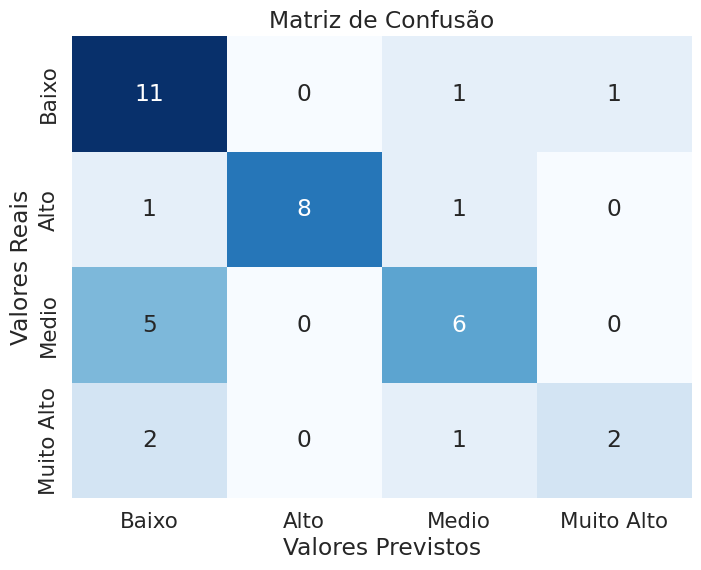

--------------VALIDAÇÃO-------------------------
Acurácia Validação: 0.67
Precisão Validação: 0.67


In [225]:
from sklearn.neighbors import KNeighborsClassifier
KN_model = KNeighborsClassifier()
treinando_cv(KN_model, X, y, cv, teste = True)
metricas(KN_model)

## Naive

Teve erro porque recebeu valores negativos, e ele não aceita.

In [226]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
treinando_cv(NB_model, X, y, cv, teste = True)

ValueError: ignored

## Gradient Boosting
Acurácia Média: 96.96%

Validação: 89%

acuracia media: [96.92]
acuracia intervalo: [86.72, 107.13]
acuracia media treino: [100.00]
Acurácia: 1.00
Precisão: 1.00


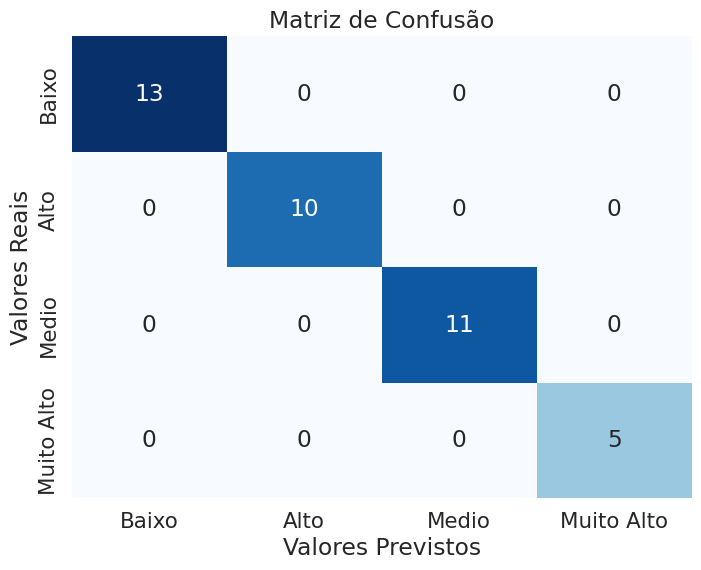

--------------VALIDAÇÃO-------------------------
Acurácia Validação: 0.89
Precisão Validação: 0.89


In [227]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
treinando_cv(GB_model, X, y, cv, teste = True)
metricas(GB_model)